In [1]:
from numpy import *

# with the biases

In [2]:
def gradAscent(data,K):
    R=mat(data)
    m,n=shape(R)
    
#     initialize user and item latent feature matrix
    p=mat(random.random((m,K)))
    q=mat(random.random((K,n)))
    
#     initialize the bisases
    bu=zeros(m)
    bd=zeros(n)
    b=mean(R[where(R!=0)])
    
#     initialize parameter
    maxCycles=10000
    beta=0.02
    alpha=0.0001
    
    ls=[]
    for step in range(maxCycles):
        for i in range(m):
            for j in range(n):
                if R[i,j] >0:
                    r=R[i,j]
                    pq=0.0
                    
                    for k in range(K):
                        pq+=p[i,k]*q[k,j]
                    e = r-b-bu[i]-bd[j]-pq
                    bu[i] = bu[i] + alpha*(2*e-beta*bu[i])
                    bd[j] = bd[j] + alpha*(2*e-beta*bd[j])

                    for k in range(K):
                        p[i,k] += alpha*(2*e*q[k,j]-beta*p[i,k])
                        q[k,j] += alpha*(2*e*p[i,k]-beta*q[k,j])    
                        
        loss=0.0
        for i in range(m):
            for j in range(n):
                bb=0.0
                dd=0.0
                pq2=0.0
                pq=0
                if R[i,j] > 0:
                    r=R[i,j]
                    bb +=bu[i]**2
                    dd +=bd[j]**2
                    for k in range(K):
                        pq2 +=p[i,k]**2+q[k,j]**2
                        pq +=p[i,k]*q[k,j]
                    
                    loss=(r-b-bu[i]-bd[j]-pq)**2+beta*(bb+dd+pq2)/2

        ls.append(loss)

        if loss<0.0001:
            break
        if step %1000==0:
            print(loss)
    
    return p,q,b,bu,bd,ls

In [3]:
R = mat([
    [5, 3, 0, 1],
    [4, 0, 0, 1],
    [1, 1, 0, 5],
    [1, 0, 0, 4],
    [0, 1, 5, 4],
])


In [4]:
if __name__ == "__main__":
    p, q, b, bu, bd, ls = gradAscent(R, 3)
    
    m,n=shape(R)
    
    bu=list(bu.reshape(m,1))
    bu=broadcast_to(bu,(m,n))
    
    bd=broadcast_to(bd,(m,n))
    
    result = b+bu+bd+p*q
    
    print(result)

0.204220684899
0.477985300398
0.241854613647
0.0566448920573
0.0428440821019
0.0460299309395
0.0461243207874
0.0457571277923
0.0455011806932
0.0453576748435
[[ 4.99473383  2.97601055  4.51240911  1.01492472]
 [ 3.98442912  2.12100657  3.99240634  1.0062682 ]
 [ 1.02444967  0.96440923  4.49198645  4.97698091]
 [ 1.00639307  0.99531179  3.20899091  3.9906479 ]
 [ 2.54176072  1.06790721  4.97098104  4.00317136]]


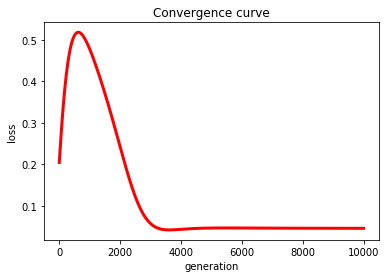

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

n=len(ls)
x=range(n)
plt.plot(x, ls, color='r',linewidth=3)
plt.title('Convergence curve')
plt.xlabel('generation')
plt.ylabel('loss')


# without the biases

In [6]:
def gradAscent(data, K):
    dataMat = mat(data)
    m, n = shape(dataMat)
    p = mat(random.random((m, K)))
    q = mat(random.random((K, n)))

    alpha = 0.0002
    beta = 0.02
    maxCycles = 10000
    
    ls=[]
    for step in range(maxCycles):
        for i in range(m):
            for j in range(n):
                if dataMat[i,j] > 0:
                    error = dataMat[i,j]
                    for k in range(K):
                        error = error - p[i,k]*q[k,j]
                    for k in range(K):
                        p[i,k] = p[i,k] + alpha * (2 * error * q[k,j] - beta * p[i,k])
                        q[k,j] = q[k,j] + alpha * (2 * error * p[i,k] - beta * q[k,j])

        loss = 0.0
        for i in range(m):
            for j in range(n):
                if dataMat[i,j] > 0:
                    error = 0.0
                    for k in range(K):
                        error = error + p[i,k]*q[k,j]
                    loss = (dataMat[i,j] - error) * (dataMat[i,j] - error)
                    for k in range(K):
                        loss = loss + beta * (p[i,k] * p[i,k] + q[k,j] * q[k,j]) / 2
        
        ls.append(loss)
        
        if loss < 0.001:
            break
        
        if step % 1000 == 0:
            print (loss)

    return p, q, ls


In [7]:
if __name__ == "__main__":
    p, q, ls= gradAscent(R, 3)
    result = p*q
    print(result)

8.76769353851
0.119781626714
0.117045337725
0.0974565504823
0.0918859407938
0.0890745385674
0.0873551626716
0.0862529274142
0.0855289584817
0.0850394992894
[[ 4.97847075  2.97887144  4.49783735  1.00243672]
 [ 3.97965482  2.13356094  3.36219521  0.99966857]
 [ 1.01512821  0.95888528  5.72972767  4.96969856]
 [ 0.99364462  1.06566947  5.03414791  3.98122399]
 [ 1.19231168  1.04969608  4.97119492  3.99921767]]


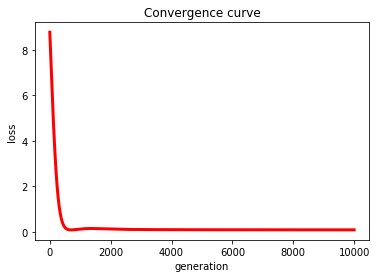

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

n=len(ls)
x=range(n)
plt.plot(x, ls, color='r',linewidth=3)
plt.title('Convergence curve')
plt.xlabel('generation')
plt.ylabel('loss')
